# test NoteSequence representation

In [27]:
from note_seq.protobuf import music_pb2
import note_seq

twinkle_twinkle = music_pb2.NoteSequence()

# Add the notes to the sequence.
twinkle_twinkle.notes.add(pitch=60, start_time=0.0, end_time=0.5, velocity=80)
twinkle_twinkle.notes.add(pitch=60, start_time=0.5, end_time=1.0, velocity=80)
twinkle_twinkle.notes.add(pitch=67, start_time=1.0, end_time=1.5, velocity=80)
twinkle_twinkle.notes.add(pitch=67, start_time=1.5, end_time=2.0, velocity=80)
twinkle_twinkle.notes.add(pitch=69, start_time=2.0, end_time=2.5, velocity=80)
twinkle_twinkle.notes.add(pitch=69, start_time=2.5, end_time=3.0, velocity=80)
twinkle_twinkle.notes.add(pitch=67, start_time=3.0, end_time=4.0, velocity=80)
twinkle_twinkle.notes.add(pitch=65, start_time=4.0, end_time=4.5, velocity=80)
twinkle_twinkle.notes.add(pitch=65, start_time=4.5, end_time=5.0, velocity=80)
twinkle_twinkle.notes.add(pitch=64, start_time=5.0, end_time=5.5, velocity=80)
twinkle_twinkle.notes.add(pitch=64, start_time=5.5, end_time=6.0, velocity=80)
twinkle_twinkle.notes.add(pitch=62, start_time=6.0, end_time=6.5, velocity=80)
twinkle_twinkle.notes.add(pitch=62, start_time=6.5, end_time=7.0, velocity=80)
twinkle_twinkle.notes.add(pitch=60, start_time=7.0, end_time=8.0, velocity=80)
# twinkle_twinkle.total_time = 8

twinkle_twinkle.tempos.add(qpm=60)
note_sequence = twinkle_twinkle

# This creates a file called `drums_sample_output.mid`, containing the drums solo we've been using.
# note_seq.sequence_proto_to_midi_file(twinkle_twinkle, 'sample_output.mid')

# create NoteSequence from midi file
# note_sequence = note_seq.midi_io.midi_file_to_note_sequence('sample_output.mid')
# note_seq.plot_sequence(note_sequence)


# primer_sequence = note_seq.trim_note_sequence(input_sequence, input_section.start_time,input_section.end_time)
# input_start_step = note_seq.quantize_to_step(0.0, 100, quantize_cutoff=0.0)
# quantize by 10ms
quantized_note_sequence = note_seq.sequences_lib.quantize_note_sequence_absolute(note_sequence, 100)
# note_seq.plot_sequence(note_sequence)
def get_methods(object, spacing=20):
    methodList = []
    for method_name in dir(object):
        try:
            if callable(getattr(object, method_name)):
                methodList.append(str(method_name))
        except:
            methodList.append(str(method_name))
        processFunc = (lambda s: ' '.join(s.split())) or (lambda s: s)
    for method in methodList:
        try:
            print(str(method.ljust(spacing)) + ' ' +
            processFunc(str(getattr(object, method).__doc__)[0:90]))
        except:
            print(method.ljust(spacing) + ' ' + ' getattr() failed')
string = quantized_note_sequence.SerializeToString()
new_note_sequence = music_pb2.NoteSequence().FromString(string)

performance = note_seq.performance_lib.Performance(quantized_note_sequence)
events = note_seq.events_lib.SimpleEventSequence(0, performance)

class OneHotEncodingNoteSequence(note_seq.encoder_decoder.OneHotEncoding):
    @property
    def num_classes(self):
        return 128 * 2 + 100 * 4
    def default_event(self):
        return 0
    def encode_event(self, event):
        return (event.event_type-1) * 128 + event.event_value
    def decode_event(self, index):
        return None

encoder_decoder = note_seq.encoder_decoder.OneHotEventSequenceEncoderDecoder(OneHotEncodingNoteSequence())
onehot = encoder_decoder.encode(performance)
print(onehot[1])
print(len(events))
print(len(onehot[0]))
print(str(performance).split('\n'))
print(performance[:10])

[306, 188, 60, 306, 188, 67, 306, 195, 67, 306, 195, 69, 306, 197, 69, 306, 197, 67, 356, 195, 65, 306, 193, 65, 306, 193, 64, 306, 192, 64, 306, 192, 62, 306, 190, 62, 306, 190, 60, 356, 188]
42
41
['(60, ON)', '(50, SHIFT)', '(60, OFF)', '(60, ON)', '(50, SHIFT)', '(60, OFF)', '(67, ON)', '(50, SHIFT)', '(67, OFF)', '(67, ON)', '(50, SHIFT)', '(67, OFF)', '(69, ON)', '(50, SHIFT)', '(69, OFF)', '(69, ON)', '(50, SHIFT)', '(69, OFF)', '(67, ON)', '(100, SHIFT)', '(67, OFF)', '(65, ON)', '(50, SHIFT)', '(65, OFF)', '(65, ON)', '(50, SHIFT)', '(65, OFF)', '(64, ON)', '(50, SHIFT)', '(64, OFF)', '(64, ON)', '(50, SHIFT)', '(64, OFF)', '(62, ON)', '(50, SHIFT)', '(62, OFF)', '(62, ON)', '(50, SHIFT)', '(62, OFF)', '(60, ON)', '(100, SHIFT)', '(60, OFF)']
[PerformanceEvent(event_type=1, event_value=60), PerformanceEvent(event_type=3, event_value=50), PerformanceEvent(event_type=2, event_value=60), PerformanceEvent(event_type=1, event_value=60), PerformanceEvent(event_type=3, event_value=50

In [34]:
# define functions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import numpy as np

def moving_average(x, w):
    # defualt window size 201 for calculating moving average
    # keep w to be odd
    if w % 2 == 0:
        w += 1
    half_w = (w-1)//2
    # pad x with averages
    x = np.concatenate([[np.mean(x[:half_w])]*half_w, x, [np.mean(x[-half_w:])]*half_w])
    return np.convolve(x, np.ones(w), 'valid') / w

def get_logs(versions):
    training_logs, validation_logs = [], []
    for version in versions:
        training_logs.append(pd.read_csv(f'lightning_logs/version_{version}/training_logs.csv'))
        validation_logs.append(pd.read_csv(f'lightning_logs/version_{version}/validation_logs.csv'))
    return training_logs, validation_logs
    
def plot_loss_changes(training_logs, validation_logs, versions, variable_label, variables, w):
    plt.figure(figsize=(15, 7))
    for i in range(len(versions)):
        sns.lineplot(x=training_logs[i]['epoch'], y=moving_average(training_logs[i]['loss'].to_numpy(), w=w), label=f'{variable_label}={variables[i]} - training', ci=None, markers=True)
        sns.lineplot(x=validation_logs[i]['epoch'], y=moving_average(validation_logs[i]['val_loss'].to_numpy(), w=w), label=f'{variable_label}={variables[i]} - validation', ci=None, markers=True)
    plt.ylabel('loss')
    plt.title(f'loss changes over epochs for different {variable_label}')
    plt.savefig(f'runs/comparison-{variable_label}.svg')
    plt.savefig(f'runs/comparison-{variable_label}.pdf')
    plt.show()
    
def plot_wer_changes(training_logs, validation_logs, versions, variable_label, variables, w):
    plt.figure(figsize=(15, 7))
    for i in range(len(versions)):
        sns.lineplot(x=training_logs[i]['epoch'], y=moving_average(training_logs[i]['wer'].to_numpy(), w=w), label=f'{variable_label}={variables[i]} - training', ci=None)
        sns.lineplot(x=validation_logs[i]['epoch'], y=moving_average(validation_logs[i]['val_wer'].to_numpy(), w=w), label=f'{variable_label}={variables[i]} - validation', ci=None)
    plt.ylabel('word error rate')
    plt.title(f'Word Error Rate changes over epochs for different {variable_label}')
    plt.savefig(f'runs/comparison-{variable_label}-wer.svg')
    plt.savefig(f'runs/comparison-{variable_label}-wer.pdf')
    plt.show()


# model tuning

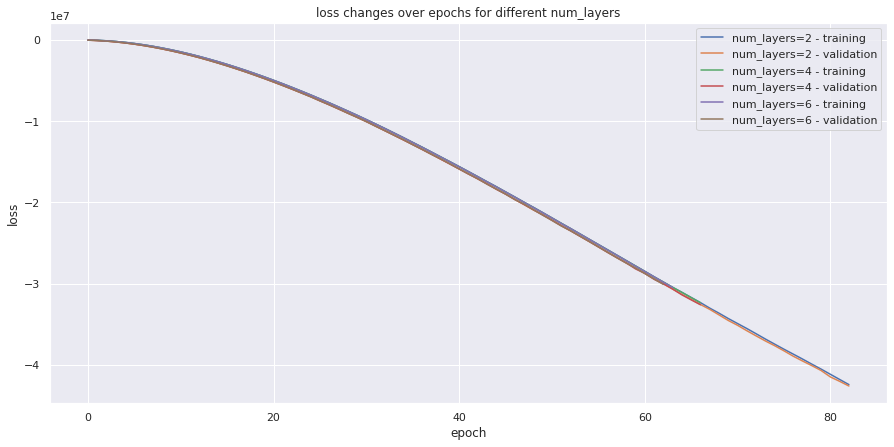

In [35]:
variable_label = 'num_layers'
variables = [2, 4, 6]
versions = [0, 1, 2]
training_logs, validation_logs = get_logs(versions)
plot_loss_changes(training_logs, validation_logs, versions, variable_label, variables, 201)

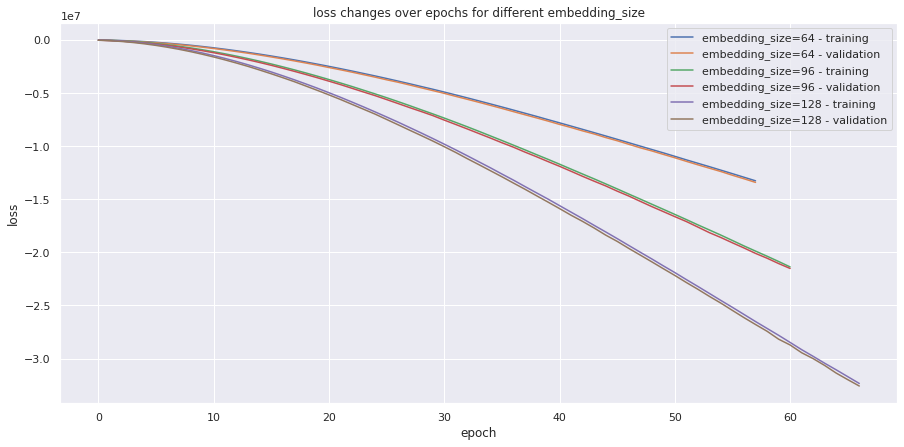

In [36]:
variable_label = 'embedding_size'
variables = [64, 96, 128]
versions = [3, 4, 1]
training_logs, validation_logs = get_logs(versions)
plot_loss_changes(training_logs, validation_logs, versions, variable_label, variables, 201)

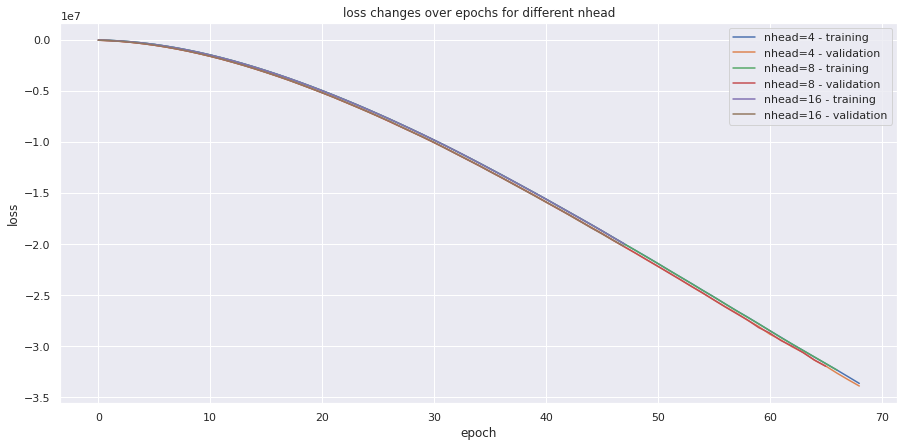

In [31]:
variable_label = 'nhead'
variables = [4, 8, 16]
versions = [5, 1, 6]
training_logs, validation_logs = get_logs(versions)
plot_loss_changes(training_logs, validation_logs, versions, variable_label, variables, 201)

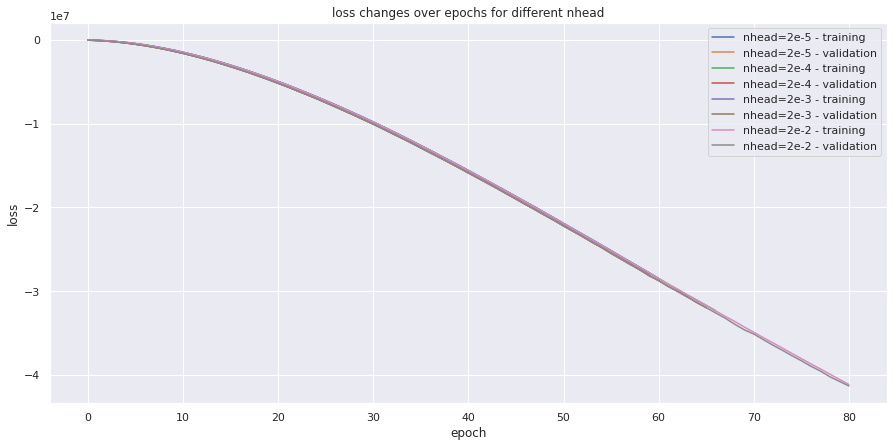

In [32]:
variable_labels = 'weight_decay'
variables = ['2e-5', '2e-4', '2e-3', '2e-2']
versions = [7, 1, 8, 9]
training_logs, validation_logs = get_logs(versions)
plot_loss_changes(training_logs, validation_logs, versions, variable_label, variables, 201)

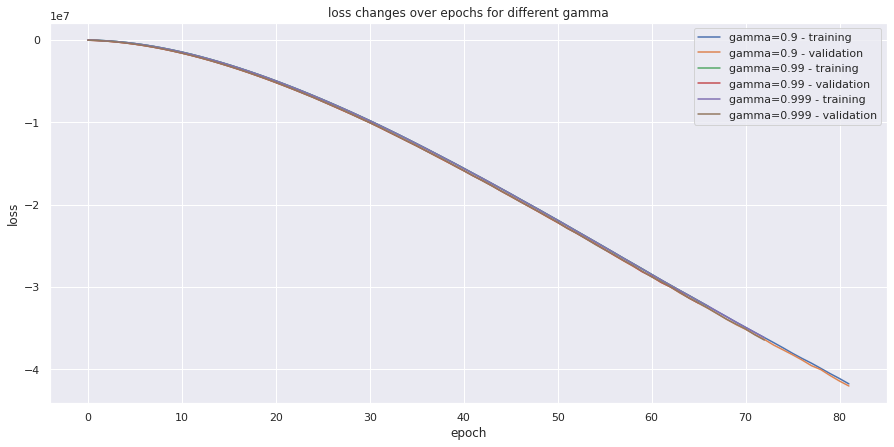

In [33]:
variable_label = 'gamma'
variables = [0.9, 0.99, 0.999]
versions = [10, 1, 11]
training_logs, validation_logs = get_logs(versions)
plot_loss_changes(training_logs, validation_logs, versions, variable_label, variables, 201)